In [1]:
import numpy as np
import pandas as pd
import pickle
import healpy as hp
import os
import glob

In [2]:
# with open("/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/no_healpix_gbm_grb_list.txt", "rb") as fp:   # Unpickling
#     no_healpix_gbm_grb_list = pickle.load(fp)

with open("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/no_healpix_gbm_grb_list_40.txt", "rb") as fp:   # Unpickling
    no_healpix_gbm_grb_list = pickle.load(fp)

# no_gbm_list = ['GRB180205184', 'GRB180128252', 'GRB171119992', 'GRB170416583', 'GRB170203486', 'GRB170113420', 'GRB161218222', 'GRB161121186', 'GRB161020024', 'GRB160314929', 'GRB160220868', 'GRB151218857', 'GRB150917148', 'GRB150618674', 'GRB150513856', 'GRB150411026', 'GRB150326542', 'GRB150325696', 'GRB140912664', 'GRB140825980', 'GRB140711691', 'GRB140628704', 'GRB140501139', 'GRB140219319', 'GRB140115899', 'GRB140109877', 'GRB131029990', 'GRB130925164', 'GRB130909817', 'GRB130908677', 'GRB120817168', 'GRB120624309', 'GRB120513531']


In [3]:
# grbweb = pd.read_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbweb/grb_grbweb.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbweb/grb_grbweb_2297.pkl")
grbweb

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center
0,GRB200529B,GRB200529504,337.200000,55.230000,58998.503432,0.000539,0.000539,1,3.506136,NaN,58998.503701
1,GRB200529A,GRB200529039,238.763917,-11.073639,58998.039294,0.001004,0.000984,0,0.000233,NaN,58998.039796
2,GRB200528A,GRB200528436,176.637458,58.192583,58997.435683,0.000700,0.000655,0,0.000194,NaN,58997.436033
3,GRB200525A,GRB200525611,20.610000,-8.520000,58994.611328,0.001081,0.001081,1,4.536708,NaN,58994.611869
4,GRB200524A,GRB200524211,212.750000,60.966667,58993.211115,0.000445,0.000437,0,0.200000,1.256,58993.211338
...,...,...,...,...,...,...,...,...,...,...,...
2292,GRB120429B,GRB120429484,133.040000,-32.230000,56046.484059,0.000178,0.000178,1,6.505598,NaN,56046.484148
2293,GRB120429A,GRB120429003,165.980000,-8.760000,56046.002860,0.000019,0.000019,1,9.378528,NaN,56046.002869
2294,GRB120427B,GRB120427153,114.700000,50.210000,56044.153189,0.000264,0.000264,1,15.003090,NaN,56044.153321
2295,GRB120427A,GRB120427054,224.935000,29.311000,56044.053773,0.000089,0.000062,0,NaN,NaN,56044.053818


## GRBs having no GBM healpix maps

In [4]:
no_gbm_name_mask = grbweb['grb_name_GBM'].isnull()
has_gbm_name_but_no_healpix_mask = grbweb['grb_name_GBM'].isin(no_healpix_gbm_grb_list)
mask = np.logical_or(no_gbm_name_mask, has_gbm_name_but_no_healpix_mask)


In [5]:
grbweb['hasHealpix'] =  np.logical_not(mask)

In [6]:
grbweb

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,58998.503432,0.000539,0.000539,1,3.506136,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,58998.039294,0.001004,0.000984,0,0.000233,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,58997.435683,0.000700,0.000655,0,0.000194,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,58994.611328,0.001081,0.001081,1,4.536708,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,58993.211115,0.000445,0.000437,0,0.200000,1.256,58993.211338,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2292,GRB120429B,GRB120429484,133.040000,-32.230000,56046.484059,0.000178,0.000178,1,6.505598,NaN,56046.484148,True
2293,GRB120429A,GRB120429003,165.980000,-8.760000,56046.002860,0.000019,0.000019,1,9.378528,NaN,56046.002869,True
2294,GRB120427B,GRB120427153,114.700000,50.210000,56044.153189,0.000264,0.000264,1,15.003090,NaN,56044.153321,True
2295,GRB120427A,GRB120427054,224.935000,29.311000,56044.053773,0.000089,0.000062,0,NaN,NaN,56044.053818,True


## How many: all vs. GBM_located vs. notGBM_located

In [7]:
print("all vs. GBM_located vs. notGBM_located")
grbweb.shape[0], np.sum(grbweb.gbm==1), np.sum(grbweb.gbm==0)

all vs. GBM_located vs. notGBM_located


(2297, 1367, 930)

## How many: all vs. hasHealpix vs. noHealpix

In [8]:
print("all, hasHealpix, noHealpix")
grbweb.shape[0], np.sum(grbweb.hasHealpix), np.sum(~grbweb.hasHealpix)


all, hasHealpix, noHealpix


(2297, 1859, 438)

## How many: GBM_located vs. hasHealpix vs. noHealpix

In [10]:
print("GBM_located vs. hasHealpix vs. noHealpix")
np.sum(grbweb.gbm==1), np.sum(np.logical_and(grbweb.gbm==1, grbweb.hasHealpix)), np.sum(np.logical_and(grbweb.gbm==1, ~grbweb.hasHealpix))



GBM_located vs. hasHealpix vs. noHealpix


(1367, 1338, 29)

## Among GBM_located && noHealpix GRBs: NaN. vs. well vs. poor

In [11]:
print("NaN, well, poor")
mask = np.logical_and(grbweb.gbm == 1, ~grbweb.hasHealpix)
np.sum(np.logical_and(mask, np.isnan(grbweb.source_uncertainty))), np.sum(np.logical_and(mask, grbweb.source_uncertainty < 1)), np.sum(np.logical_and(mask, grbweb.source_uncertainty >= 1))


NaN, well, poor


(29, 0, 0)

## Among notGBM_located: NaN. vs. well vs. poor

In [12]:
print("NaN, well, poor")
mask = grbweb.gbm == 0
np.sum(np.logical_and(mask, np.isnan(grbweb.source_uncertainty))), np.sum(np.logical_and(mask, grbweb.source_uncertainty < 1)), np.sum(np.logical_and(mask, grbweb.source_uncertainty >= 1))


NaN, well, poor


(69, 781, 80)

## Confirm hasHealpix feild with healpix .fit files

In [14]:
# in_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/healpix"
in_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/healpix"
for idx in grbweb.index: 
    if grbweb.hasHealpix[idx]:
        files = glob.glob("{}/*_healpix_*{}*.fit".format(in_folder, grbweb.grb_name_GBM[idx][3:]))
        if len(files) == 0:
            print(grbweb.grb_name_GBM + " has no healpix .fit file.")
        elif len(files) > 1:
            print(grbweb.grb_name_GBM + " has more than one .fit files.")
        else :
            pass
        
# IF no printouts, then likely everything is correct
# Meaning: all GRBs that is classified as hasHealpix=True does has one and only one healpix file

## Put / store everything together

For GBM-GRBs (with `gbm=1`), use healpix map if it exists, create a fake healpix if it doesn't (24 of them). \
For non-GBM GRBs (with `gbm=0`), create a fake healpix.\

Whenever a fake healpix map is created, `source_uncertainty` is used:
- When `source_uncertainty is NaN`: 1 degree is used
- When `source_uncertainty <= 1`: 1 degree is used
- When `source_uncertainty > 1`: `source_uncertainty` itself is used



In [15]:
def createFakeHealpix(ra, dec, source_uncertainty, deg=True):
    if deg:
        ra = np.deg2rad(ra)
        dec = np.deg2rad(dec)
        source_uncertainty = np.deg2rad(source_uncertainty)
    
    theta = np.pi/2. - dec                                  # Convert to healpy stuff
    phi = ra
    nside = 128                                             # Pass as argument if needed
    probs = np.zeros(hp.pixelfunc.nside2npix(nside))        # Array of zeros with length from nside
    pixel = hp.pixelfunc.ang2pix(nside, theta, phi)         # Find the pixel that matches the location of the GRB
    vec = hp.pixelfunc.pix2vec(nside, pixel)                  # Find the vector to that pixel
    if np.isnan(source_uncertainty) == True or source_uncertainty < np.radians(1.0):
            source_uncertainty = np.radians(1.0)            # Scan minimum of 1 degree around source
    pixels = hp.query_disc(nside, vec, source_uncertainty)    # Find all the pixels within appropriate degrees of that pixel
    probs[pixels] = 1.                                      # Consider all those pixels equally
    probs[pixels] /= np.sum(probs)
    
    return probs

In [16]:
# in_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/gbm/healpix"
# out_folder = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbgbm"
in_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/gbm/healpix"
out_folder = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm"

In [17]:
grbweb.index

RangeIndex(start=0, stop=2297, step=1)

In [21]:
probss = []
for idx in grbweb.index: 
    isGBM = grbweb.gbm[idx] == 1
    hasHealpix = grbweb.hasHealpix[idx]
    source_uncertainty = grbweb.source_uncertainty[idx]
    probs = None
    if isGBM and hasHealpix:
        gbm_number = grbweb.grb_name_GBM[idx][3:]
        files = glob.glob("{}/*_healpix_*{}*.fit".format(in_folder, gbm_number))
#         print(files)
        
        if len(files) > 1 or len(files) == 0:
            print("No healpix OR more than one healpix.")
            break
        probs = hp.read_map(files[0], verbose=False)
    else:
        probs = createFakeHealpix(grbweb.ra[idx], grbweb.dec[idx], grbweb.source_uncertainty[idx])
        
    probss.append(probs)

grbweb['probs'] = probss       

/storage/home/hhive1/cchen641/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [22]:
# grbweb.to_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
# grbweb.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")



## store the last column in multiply files for clound computing

In [23]:
# grbweb = pd.read_pickle("/data/user/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")


In [26]:
grbweb.head()

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center,hasHealpix,probs
0,GRB200529B,GRB200529504,337.200000,55.230000,58998.503432,0.000539,0.000539,1,3.506136,NaN,58998.503701,True,"[-1.1531762211802743e-09, -1.1525613796692369e..."
1,GRB200529A,GRB200529039,238.763917,-11.073639,58998.039294,0.001004,0.000984,0,0.000233,NaN,58998.039796,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,GRB200528436,176.637458,58.192583,58997.435683,0.000700,0.000655,0,0.000194,NaN,58997.436033,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,GRB200525611,20.610000,-8.520000,58994.611328,0.001081,0.001081,1,4.536708,NaN,58994.611869,True,"[7.562859782872522e-10, 7.339820418117426e-10,..."
4,GRB200524A,GRB200524211,212.750000,60.966667,58993.211115,0.000445,0.000437,0,0.200000,1.256,58993.211338,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [27]:
grbweb_gbm_df = grbweb.iloc[:,:-1]
grbweb_gbm_df.head()

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center,hasHealpix
0,GRB200529B,GRB200529504,337.200000,55.230000,58998.503432,0.000539,0.000539,1,3.506136,NaN,58998.503701,True
1,GRB200529A,GRB200529039,238.763917,-11.073639,58998.039294,0.001004,0.000984,0,0.000233,NaN,58998.039796,True
2,GRB200528A,GRB200528436,176.637458,58.192583,58997.435683,0.000700,0.000655,0,0.000194,NaN,58997.436033,True
3,GRB200525A,GRB200525611,20.610000,-8.520000,58994.611328,0.001081,0.001081,1,4.536708,NaN,58994.611869,True
4,GRB200524A,GRB200524211,212.750000,60.966667,58993.211115,0.000445,0.000437,0,0.200000,1.256,58993.211338,True


In [28]:
healpix_df = grbweb[['grb_name','probs']]
healpix_df.head()

,grb_name,probs
0,GRB200529B,"[-1.1531762211802743e-09, -1.1525613796692369e..."
1,GRB200529A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,"[7.562859782872522e-10, 7.339820418117426e-10,..."
4,GRB200524A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [29]:
# grbweb_gbm_df.to_pickle("/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_noHeaplix.pkl")
# grbweb_gbm_df.to_pickle("/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/grbweb_gbm_noHeaplix_2297.pkl")


In [30]:
# for idx in healpix_df.index:
#     grb_name = healpix_df.grb_name[idx]
#     prob = healpix_df.probs[idx]
# #     outfile = "/home/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/healpix/{}_healpix.npy".format(grb_name)
#     outfile = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/healpix/{}_healpix.npy".format(grb_name)
#     np.save(outfile, prob)
    

## nside from 128 to 64

In [91]:
# grbweb = pd.read_pickle("/data/user/cjchen/2020-2021/Spring2021/greco_grb/data/grbwebgbm/grbweb_gbm_healpix.pkl")
grbweb = pd.read_pickle("/storage/home/hhive1/cchen641/icecube/greco_grb/data/grbwebgbm/grbweb_gbm_healpix_2297.pkl")


In [92]:
grbweb.head()

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center,hasHealpix,probs
0,GRB200529B,GRB200529504,337.200000,55.230000,58998.503432,0.000539,0.000539,1,3.506136,NaN,58998.503701,True,"[-1.1531762211802743e-09, -1.1525613796692369e..."
1,GRB200529A,GRB200529039,238.763917,-11.073639,58998.039294,0.001004,0.000984,0,0.000233,NaN,58998.039796,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,GRB200528436,176.637458,58.192583,58997.435683,0.000700,0.000655,0,0.000194,NaN,58997.436033,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,GRB200525611,20.610000,-8.520000,58994.611328,0.001081,0.001081,1,4.536708,NaN,58994.611869,True,"[7.562859782872522e-10, 7.339820418117426e-10,..."
4,GRB200524A,GRB200524211,212.750000,60.966667,58993.211115,0.000445,0.000437,0,0.200000,1.256,58993.211338,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [93]:
healpix_df = grbweb[['grb_name','probs']].copy()

In [94]:
healpix_df.head()

,grb_name,probs
0,GRB200529B,"[-1.1531762211802743e-09, -1.1525613796692369e..."
1,GRB200529A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB200528A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GRB200525A,"[7.562859782872522e-10, 7.339820418117426e-10,..."
4,GRB200524A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [95]:
for idx in healpix_df.index:
    grb_name = healpix_df.grb_name[idx]
    prob = healpix_df.probs[idx]
    prob64 = hp.ud_grade(prob, 64)
    prob64 = prob64 / prob64.sum()
    outfile = "/storage/home/hhive1/cchen641/data/icecube/data/greco_grb/data/grbwebgbm/healpix/{}_healpix_nside64.npy".format(grb_name)
#     np.save(outfile, prob64)


In [33]:
### for plots only
test128 = np.maximum(1e-6, test128)
test64 = np.maximum(1e-6, test64)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import csky as cy

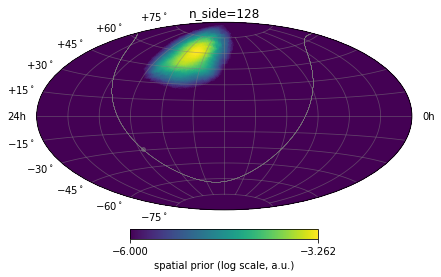

In [39]:
fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(test128), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'spatial prior (log scale)')
plt.title("GRB190612A, n_side=128")
plt.tight_layout()

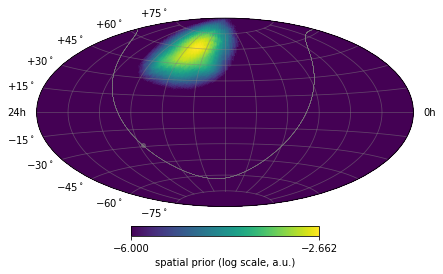

In [36]:
fig, ax = plt.subplots (subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(test64), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'spatial prior (log scale, a.u.)')
plt.tight_layout()